# Análisis de datos y relaciones entre variables.

##Activación para Colab

In [0]:
#LMG: Variable para controlar si estamos en Colab o no y aplicar a las celdas:
inColab = False

In [0]:
#LMG: Para Google CoLab tener el repo de Drive:
if inColab:
  from google.colab import drive
  drive.mount('/content/drive')

##Carga de librerías y preparación de datos

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
import seaborn as sns 
from scipy.stats import norm 

In [0]:
#LMG: Para CoLab en sample_data:
if inColab:
  data_consumo = pd.read_csv("/content/drive/My Drive/TFM/data/data_total.csv")
else:
  data_consumo = pd.read_csv("data_total.csv")

  
data_consumo = data_consumo.loc[:, ~data_consumo.columns.str.contains('^Unnamed')]  
data_consumo.head()

,fecha,PVPC_DEF,PVPC_2_PED_NOC,PVPC_ELEC_NOC,date_timestamp,Demanda,Eolica,Nuclear,Solar,Solar_Fotovoltaica,Solar_Termica,Termica_Renovable,Prevista,Programada,date_day,Brent_price,Holiday,Precio de Regulación Secundaria subir,Precio de Regulación Secundaria bajar,Precio mercado SPOT Diario_x,Demanda real,Generación prevista Solar,Saldo total interconexiones programa p48,Generación programada P48 Exportación Portugal,Generación programada P48 Exportación Francia,Generación programada P48 Importación Portugal,Generación programada P48 Importación Francia,Precio SPOT PT,Precio SPOT FR
0,2015-10-01 00:00:00+02:00,117.77,69.49,71.88,1.443650e+09,24984.666667,1003.666667,6012.833333,402.166667,33.0,368.500000,580.166667,24691.833333,24517.0,2015-10-01,47.48,0.0,61.18,NaN,56.65,25305.0,267.6,182.4,-606.6,NaN,NaN,1200.0,56.65,38.56
1,2015-10-01 01:00:00+02:00,117.09,68.21,65.57,1.443654e+09,23550.833333,899.000000,6013.166667,174.833333,33.0,141.333333,584.166667,23440.000000,23169.0,2015-10-01,47.48,0.0,59.59,NaN,53.50,23959.0,195.7,-269.5,-1112.5,NaN,NaN,1200.0,53.50,31.27
2,2015-10-01 02:00:00+02:00,114.59,65.34,62.53,1.443658e+09,22648.166667,927.500000,6013.500000,103.833333,33.0,70.666667,585.833333,22521.166667,22437.0,2015-10-01,47.48,0.0,56.27,49.13,49.69,22873.0,202.1,94.0,-951.0,NaN,NaN,1200.0,49.69,30.66
3,2015-10-01 03:00:00+02:00,116.60,66.53,63.40,1.443661e+09,22203.833333,935.666667,6013.000000,102.000000,33.0,69.000000,588.500000,22335.333333,22281.0,2015-10-01,47.48,0.0,45.99,45.50,49.10,22550.0,61.3,319.7,-846.3,NaN,NaN,1200.0,49.10,29.14
4,2015-10-01 04:00:00+02:00,122.07,71.03,67.37,1.443665e+09,21987.833333,900.833333,6014.166667,101.666667,33.0,68.166667,589.000000,22177.833333,21910.0,2015-10-01,47.48,0.0,52.28,49.13,51.25,22017.0,45.1,405.5,-760.5,NaN,NaN,1200.0,51.25,29.40


## Estudio de los datos

## Estudio de la variable precio global
Vamos a ver las relaciones y los los metadatos asociados de la variable del precio.

In [0]:
x = data_consumo['date_timestamp']
data_pvpc = data_consumo['PVPC_DEF']

data_pvpc.describe() 

count    30555.000000
mean       115.043786
std         15.745210
min         60.730000
25%        106.060000
50%        115.720000
75%        125.650000
max        182.540000
Name: PVPC_DEF, dtype: float64

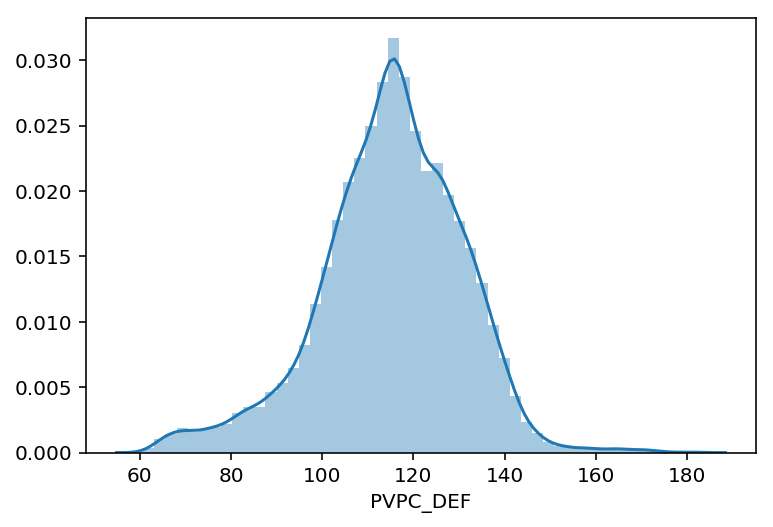

In [0]:
sns.distplot(data_pvpc)

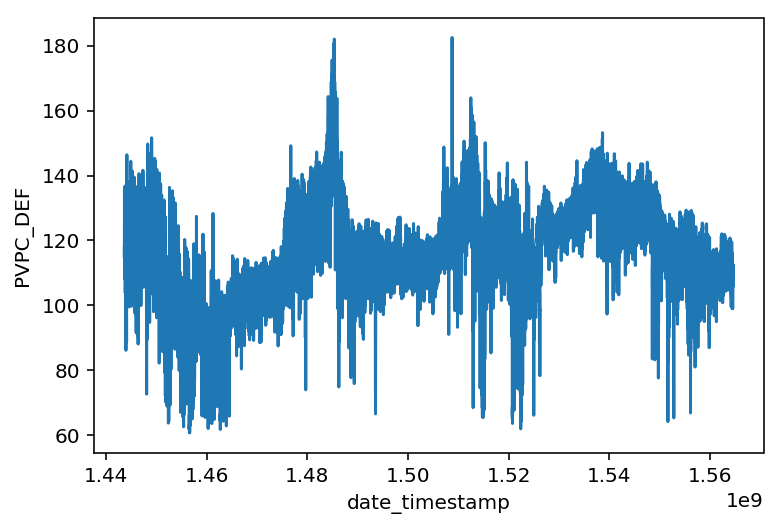

In [0]:
sns.lineplot(x="date_timestamp", y="PVPC_DEF",data=data_consumo)


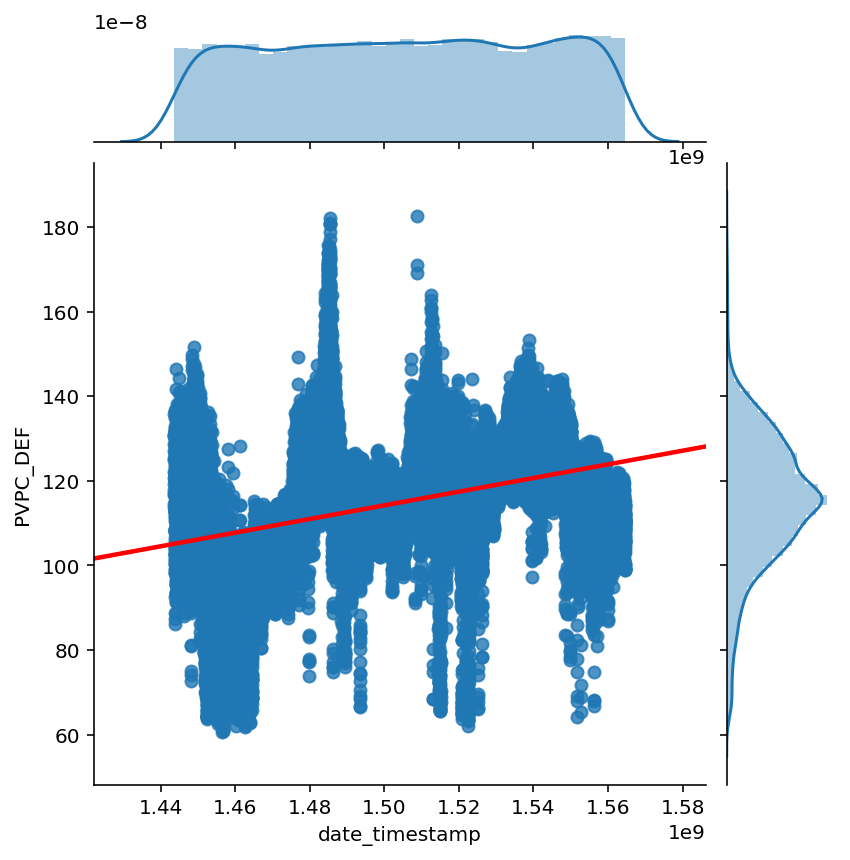

In [0]:
sns.jointplot(x="date_timestamp", y="PVPC_DEF",  kind='reg', data=data_consumo,  joint_kws={'line_kws':{'color':'red'}})

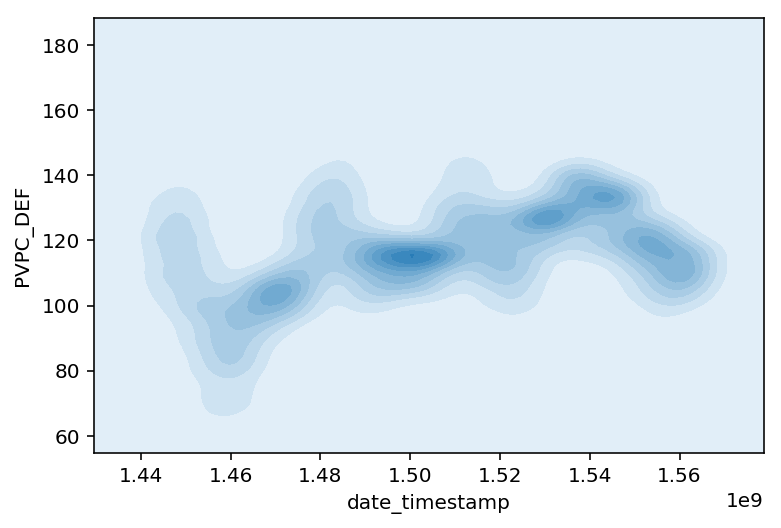

In [0]:
sns.kdeplot(x, y, shade=True)

## Estudio de la variable precio a nivel semanal y mensual

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

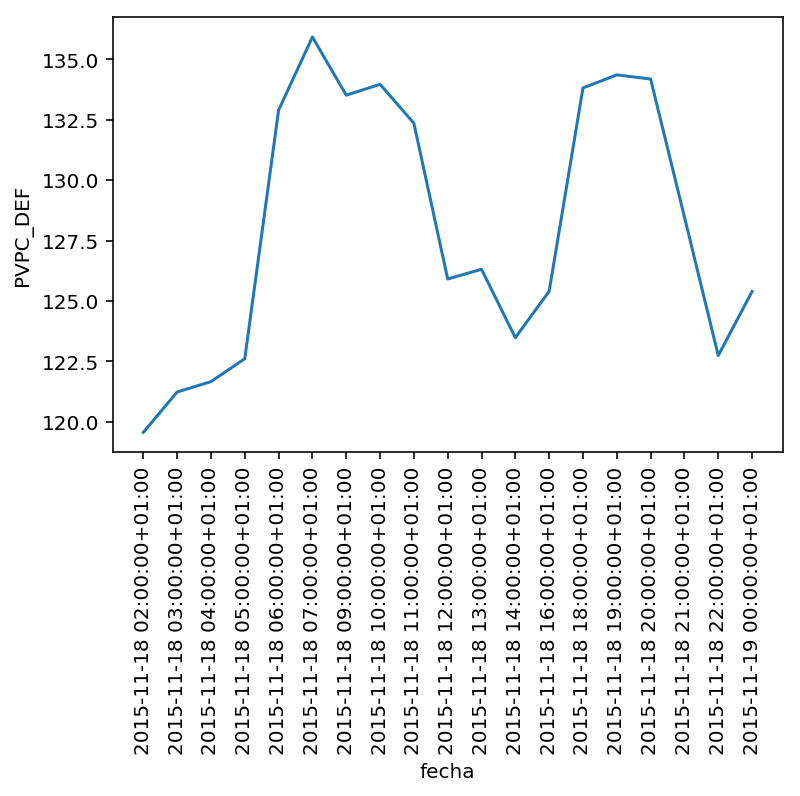

In [0]:
data_tiempo_dia = data_consumo.loc[1004:1022,'fecha']
data_pvpc_dia = data_consumo.loc[1004:1022,'PVPC_DEF']

data_tiempo_semana = data_consumo.loc[1004:1172,'fecha']
data_pvpc_semana = data_consumo.loc[1004:1172,'PVPC_DEF']

df = sns.lineplot(data_tiempo_dia, data_pvpc_dia)
labels = df.get_xticklabels()
plt.setp(labels, rotation=90)

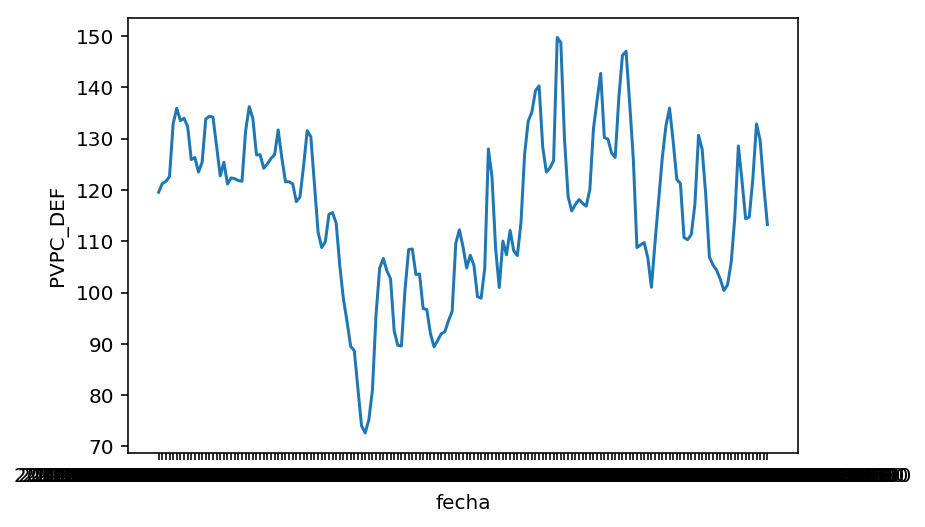

In [0]:
sns.lineplot(data_tiempo_semana, data_pvpc_semana)


## Detección de Outliers
Podemos observar que la variable del precio tiene muchos Outliers, esto hará que la exactitud de nuestro modelo decaiga mucho. Será requerido probar el estudio con la regularización de estos o sin ella. 

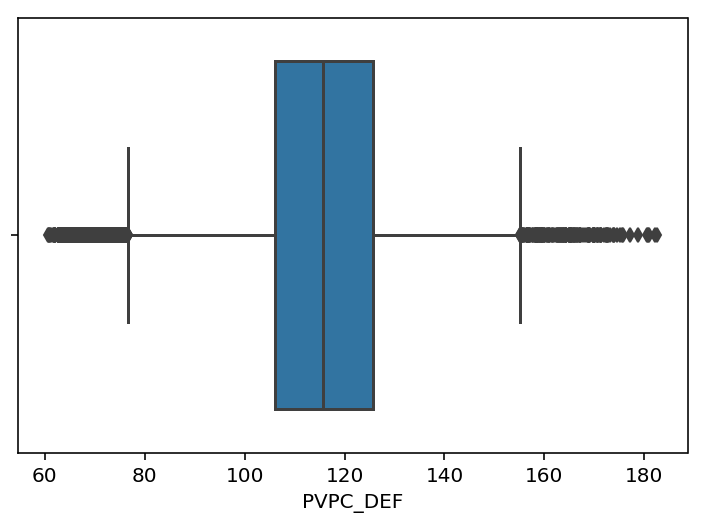

In [0]:
sns.boxplot(data_consumo['PVPC_DEF'])